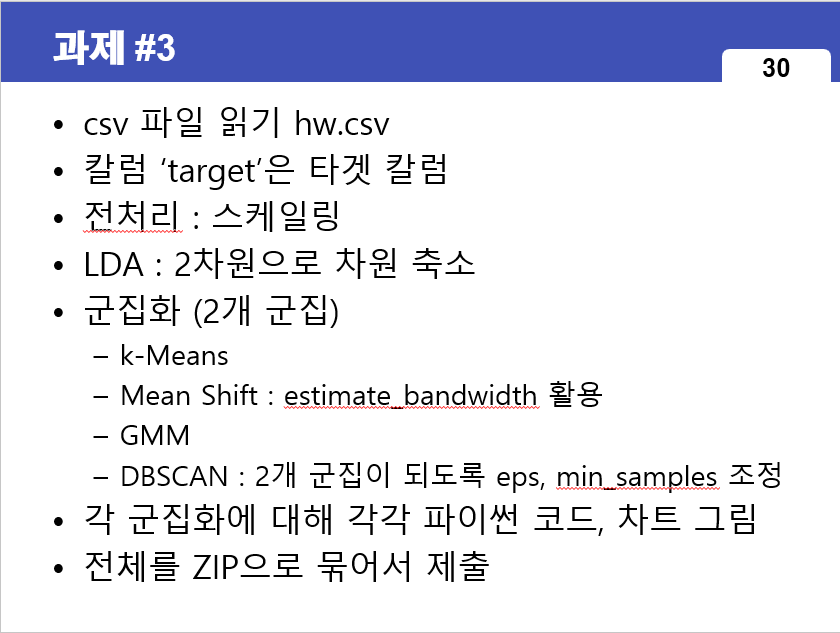

In [37]:
# 데이터 읽어오기
import pandas as pd

hw = pd.read_csv('C:/woogi/KWU/3-2/Machine_Learning/hw.csv')

hw

,f1,f2,f3,f4,f5,target
0,1.030972,-0.449614,0.581358,1.480586,2.511557,1
1,0.902691,0.372013,1.274705,0.530678,1.433370,0
2,-0.658288,0.761872,0.103584,-1.420159,-2.078447,0
3,1.908221,0.360373,2.268593,1.547848,3.456069,1
4,0.877666,0.153999,1.031665,0.723666,1.601332,0
...,...,...,...,...,...,...
1995,1.208901,-0.625424,0.583477,1.834325,3.043226,3
1996,0.583186,0.769510,1.352696,-0.186325,0.396861,2
1997,-0.042380,0.854736,0.812355,-0.897116,-0.939497,2
1998,1.126970,0.415335,1.542305,0.711634,1.838604,2


In [38]:
# 데이터 전처리 : 스케일링
from sklearn.preprocessing import StandardScaler
hw_scaled = StandardScaler().fit_transform(hw.iloc[:, :-1])

In [39]:
# 차원 축소 : LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(hw_scaled, hw.target)
hw_lda = lda.transform(hw_scaled)
hw_lda_df = pd.DataFrame(hw_lda, columns = ['component1', 'component2'])
hw_lda_df['target'] = hw.target

hw_lda_df

,component1,component2,target
0,2.243355,0.455772,1
1,-0.034032,-0.672026,0
2,-2.181906,0.595953,0
3,0.712330,-1.862497,1
4,0.528237,-0.301777,0
...,...,...,...
1995,2.837726,0.516220,3
1996,-1.318977,-0.908202,2
1997,-1.990800,-0.289256,2
1998,0.010264,-1.009202,2


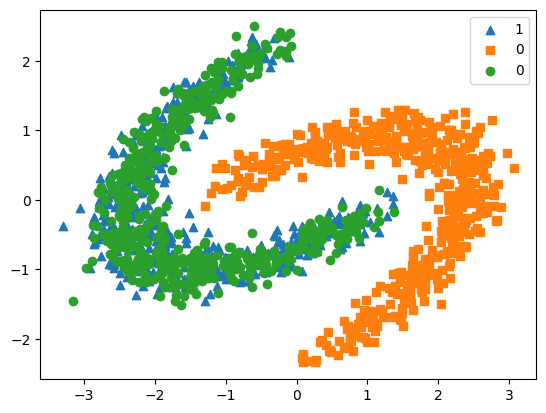

In [40]:
# LDA 적용 차트
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x = hw_lda_df[hw_lda_df['target'] == i].iloc[:, 0]
    y = hw_lda_df[hw_lda_df['target'] == i].iloc[:, 1]
    plt.scatter(x, y, marker = marker, label = hw_lda_df.target[i])
plt.legend()
plt.show()

In [41]:
# 군집화 1 : k-Means Algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, max_iter = 3000).fit(hw_lda_df.iloc[:, :2])
kmeans.fit(hw_lda_df.iloc[:, :2])
hw_lda_df['kmeans-cluster'] = kmeans.labels_

hw_lda_df

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,component1,component2,target,kmeans-cluster
0,2.243355,0.455772,1,0
1,-0.034032,-0.672026,0,0
2,-2.181906,0.595953,0,1
3,0.712330,-1.862497,1,0
4,0.528237,-0.301777,0,0
...,...,...,...,...
1995,2.837726,0.516220,3,0
1996,-1.318977,-0.908202,2,1
1997,-1.990800,-0.289256,2,1
1998,0.010264,-1.009202,2,0


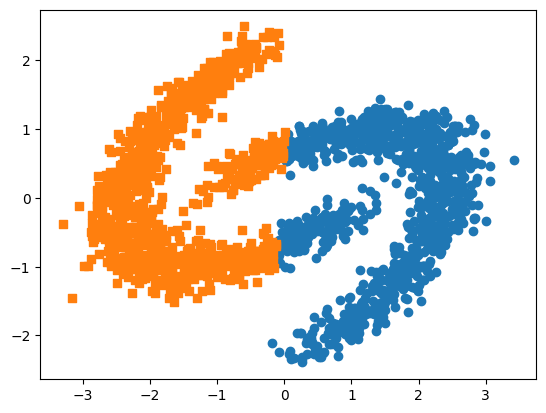

In [42]:
# k-means 차트
marker0_index = hw_lda_df[hw_lda_df['kmeans-cluster'] == 0].index
marker1_index = hw_lda_df[hw_lda_df['kmeans-cluster'] == 1].index

plt.scatter(x = hw_lda_df.loc[marker0_index, 'component1'],
            y = hw_lda_df.loc[marker0_index, 'component2'], marker = 'o')
plt.scatter(x = hw_lda_df.loc[marker1_index, 'component1'],
            y = hw_lda_df.loc[marker1_index, 'component2'], marker = 's')

plt.show()

In [43]:
# 군집화 2 : Mean Shift (estimate_bandwidth())
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(hw_lda_df.iloc[:, :2])
meanshift = MeanShift(bandwidth = bw)
meanshift.fit_predict(hw_lda_df.iloc[:, :2])
hw_lda_df['meanshift-cluster'] = meanshift.labels_

hw_lda_df

,component1,component2,target,kmeans-cluster,meanshift-cluster
0,2.243355,0.455772,1,0,0
1,-0.034032,-0.672026,0,0,1
2,-2.181906,0.595953,0,1,1
3,0.712330,-1.862497,1,0,0
4,0.528237,-0.301777,0,0,0
...,...,...,...,...,...
1995,2.837726,0.516220,3,0,0
1996,-1.318977,-0.908202,2,1,1
1997,-1.990800,-0.289256,2,1,1
1998,0.010264,-1.009202,2,0,1


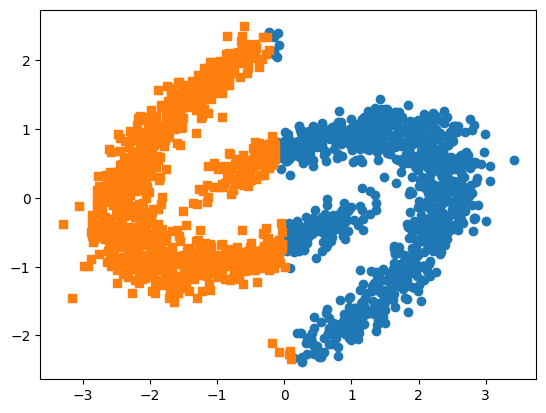

In [44]:
# meanshift 차트
marker0_index = hw_lda_df[hw_lda_df['meanshift-cluster'] == 0].index
marker1_index = hw_lda_df[hw_lda_df['meanshift-cluster'] == 1].index

plt.scatter(x = hw_lda_df.loc[marker0_index, 'component1'],
            y = hw_lda_df.loc[marker0_index, 'component2'], marker = 'o')
plt.scatter(x = hw_lda_df.loc[marker1_index, 'component1'],
            y = hw_lda_df.loc[marker1_index, 'component2'], marker = 's')

plt.show()

In [45]:
# 군집화 3 : GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2)
gmm_labels = gmm.fit_predict(hw_lda_df.iloc[:, :2])
hw_lda_df['gmm-cluster'] = gmm_labels

hw_lda_df

,component1,component2,target,kmeans-cluster,meanshift-cluster,gmm-cluster
0,2.243355,0.455772,1,0,0,0
1,-0.034032,-0.672026,0,0,1,0
2,-2.181906,0.595953,0,1,1,1
3,0.712330,-1.862497,1,0,0,0
4,0.528237,-0.301777,0,0,0,0
...,...,...,...,...,...,...
1995,2.837726,0.516220,3,0,0,0
1996,-1.318977,-0.908202,2,1,1,1
1997,-1.990800,-0.289256,2,1,1,1
1998,0.010264,-1.009202,2,0,1,0


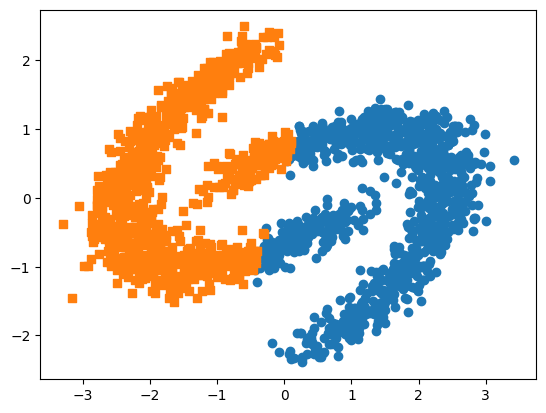

In [46]:
# GMM 차트
marker0_index = hw_lda_df[hw_lda_df['gmm-cluster'] == 0].index
marker1_index = hw_lda_df[hw_lda_df['gmm-cluster'] == 1].index

plt.scatter(x = hw_lda_df.loc[marker0_index, 'component1'],
            y = hw_lda_df.loc[marker0_index, 'component2'], marker = 'o')
plt.scatter(x = hw_lda_df.loc[marker1_index, 'component1'],
            y = hw_lda_df.loc[marker1_index, 'component2'], marker = 's')

plt.show()

In [47]:
# 군집화 4 : DBSCAN (2개 군집이 되도록 eps, min_samples 조정)
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.3, min_samples = 8)
dbscan_labels = dbscan.fit_predict(hw_lda_df.iloc[:, :2])
hw_lda_df['dbscan-cluster'] = dbscan_labels

hw_lda_df

,component1,component2,target,kmeans-cluster,meanshift-cluster,gmm-cluster,dbscan-cluster
0,2.243355,0.455772,1,0,0,0,0
1,-0.034032,-0.672026,0,0,1,0,1
2,-2.181906,0.595953,0,1,1,1,1
3,0.712330,-1.862497,1,0,0,0,0
4,0.528237,-0.301777,0,0,0,0,1
...,...,...,...,...,...,...,...
1995,2.837726,0.516220,3,0,0,0,0
1996,-1.318977,-0.908202,2,1,1,1,1
1997,-1.990800,-0.289256,2,1,1,1,1
1998,0.010264,-1.009202,2,0,1,0,1


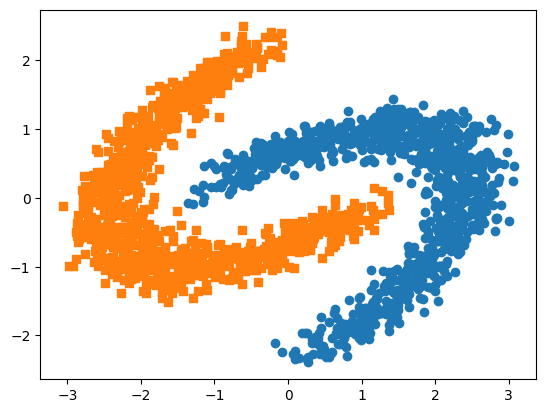

In [48]:
# DBSCAN 차트
marker0_index = hw_lda_df[hw_lda_df['dbscan-cluster'] == 0].index
marker1_index = hw_lda_df[hw_lda_df['dbscan-cluster'] == 1].index

plt.scatter(x = hw_lda_df.loc[marker0_index, 'component1'],
            y = hw_lda_df.loc[marker0_index, 'component2'], marker = 'o')
plt.scatter(x = hw_lda_df.loc[marker1_index, 'component1'],
            y = hw_lda_df.loc[marker1_index, 'component2'], marker = 's')

plt.show()